# Exploratory Data Analysis

1. Set up and import data
2. Univariate analysis - view how the features are distributed 
3. Bivariate analysis - view how/if the distribution changes based on whether the class of the credit is good or bad
4. Data Pre-processing and Feature Engineering


## 1. Set up and import data

*Importing libraries and set up*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import chi2_contingency


sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None) 

*Importing Data*

In [2]:
df = pd.read_csv("credit_traindata.csv")
df.head(5)

checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none                4   
1                       2  female div/dep/mar          none                2   
2                       2         male single          none                3   
3                       2         male single     guarantor                4   
4                       3         male single          none                4   

  property_magnitude  age other_payment_plans   housing  existing_credits  \
0        real estate   67                none       own                 2   
1        real estate   22                none       own                 1   
2        real estate   49                none       own                 1   
3     life insurance   45                none  for free                 1   
4  no known property   53                none  for free                 2   

                  job  num_dependents own_telephone foreign_worker class  
0             skilled               1           yes            yes  good  
1             skilled               1          none            yes   bad  
2  unskilled resident               2          none            yes  good  
3             skilled               2          none            yes  good  
4             skilled               2          none            yes   bad

Check for any missing data:


In [3]:
print(df.isnull().sum()) 

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


There is no missing data. Some more information about the dataset:

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         798 non-null    object
 1   duration                798 non-null    int64 
 2   credit_history          798 non-null    object
 3   purpose                 798 non-null    object
 4   credit_amount           798 non-null    int64 
 5   savings_status          798 non-null    object
 6   employment              798 non-null    object
 7   installment_commitment  798 non-null    int64 
 8   personal_status         798 non-null    object
 9   other_parties           798 non-null    object
 10  residence_since         798 non-null    int64 
 11  property_magnitude      798 non-null    object
 12  age                     798 non-null    int64 
 13  other_payment_plans     798 non-null    object
 14  housing                 798 non-null    object
 15  existi

Detail on the breakdown of the categorical variables:

In [5]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']

for col in cat_cols:
    print(df[col].value_counts(), "\n\n")

no checking    309
0<=X<200       225
<0             209
>=200           55
Name: checking_status, dtype: int64 


existing paid                     423
critical/other existing credit    235
delayed previously                 70
all paid                           37
no credits/all paid                33
Name: credit_history, dtype: int64 


radio/tv               223
new car                182
furniture/equipment    144
used car                81
business                77
education               45
repairs                 19
other                   10
domestic appliance       9
retraining               8
Name: purpose, dtype: int64 


<100                476
no known savings    140
100<=X<500           89
500<=X<1000          51
>=1000               42
Name: savings_status, dtype: int64 


1<=X<4        275
>=7           202
4<=X<7        141
<1            132
unemployed     48
Name: employment, dtype: int64 


male single           436
female div/dep/mar    255
male mar/wid          

## 2. Univariate Analysis

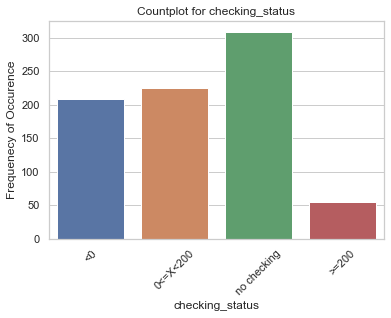

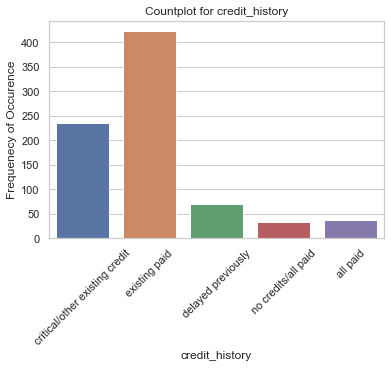

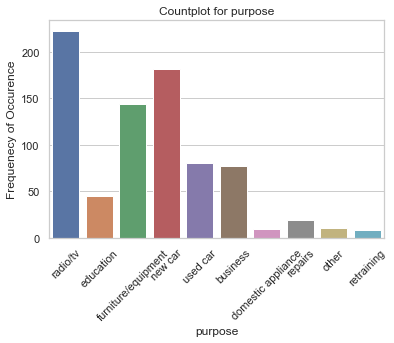

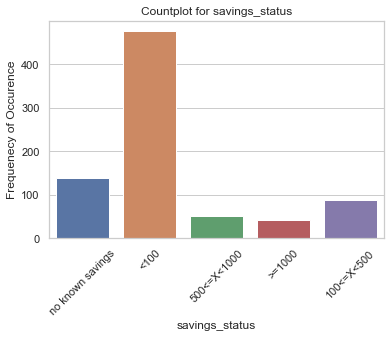

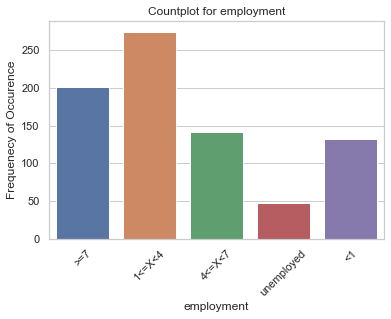

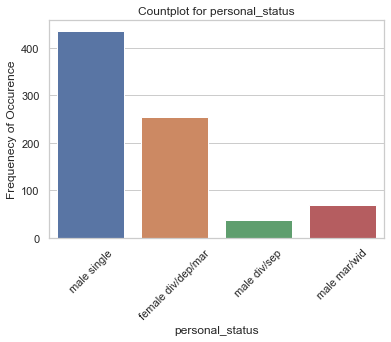

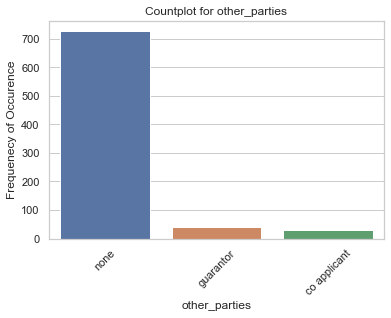

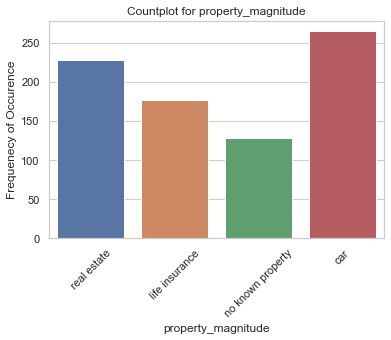

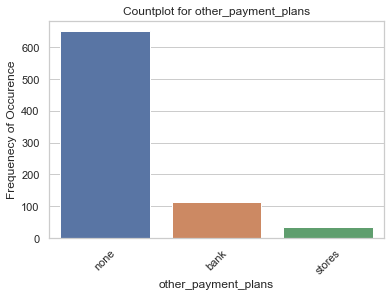

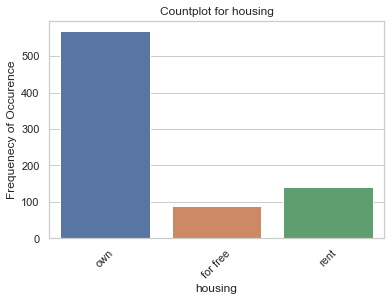

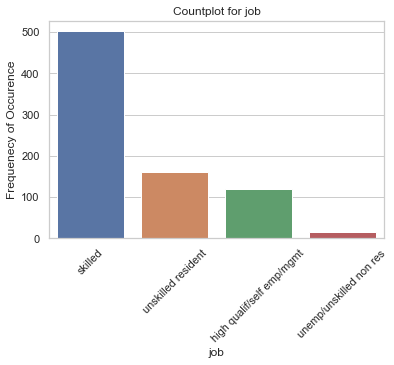

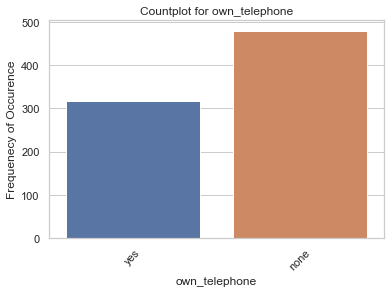

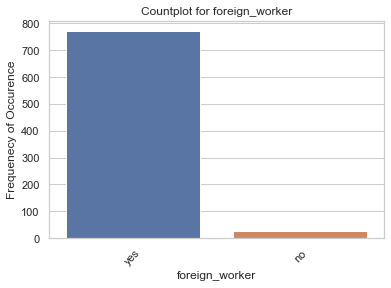

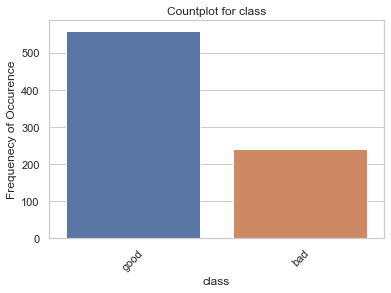

In [6]:
for col in df.select_dtypes(include='object'):
    sns.countplot(x=col, data=df)
    plt.xlabel(f"{col}")
    plt.ylabel("Frequenecy of Occurence")
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.show()

*Some histograms of the numerical features:*

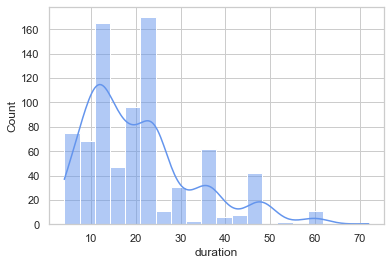

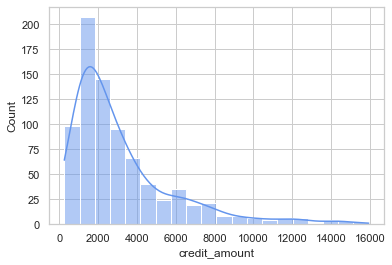

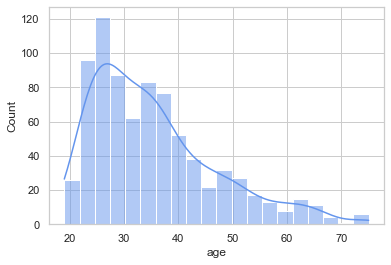

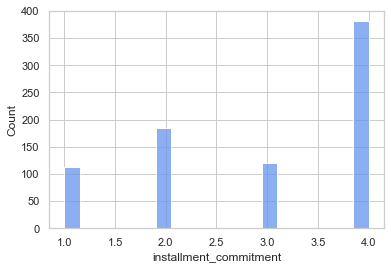

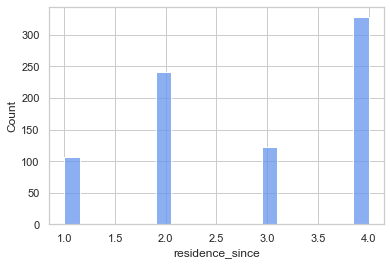

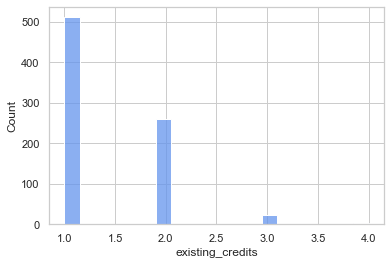

In [7]:
num_cols = ['duration', 'credit_amount', 'age', 'installment_commitment', 'residence_since', 'existing_credits']

for col in num_cols:
    kde = False
    if col in ['duration', 'credit_amount', 'age']:
        kde = True
    sns.histplot(x=col,data=df,bins=20, color='cornflowerblue',kde=kde)
    plt.show()

The continuous numerical distributions are all positively skewed. 

## 3. Bivariate Analysis

Let's see how different the distribution of the numerical features are for the two different classes of good and bad:

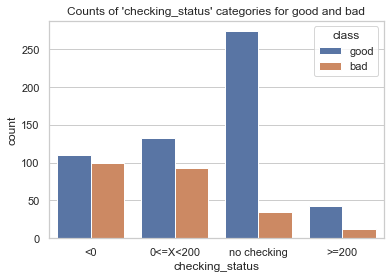

Percentage of <0 classified as bad: 47.37%
Percentage of 0<=X<200 classified as bad: 41.33%
Percentage of no checking classified as bad: 11.33%
Percentage of >=200 classified as bad: 21.82%




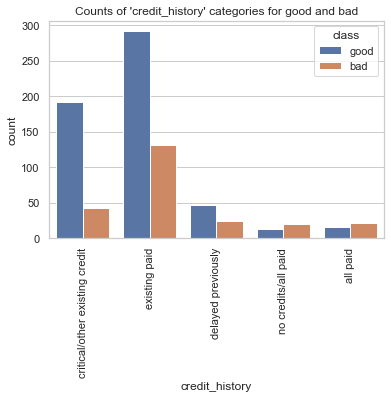

Percentage of critical/other existing credit classified as bad: 18.3%
Percentage of existing paid classified as bad: 30.97%
Percentage of delayed previously classified as bad: 34.29%
Percentage of no credits/all paid classified as bad: 60.61%
Percentage of all paid classified as bad: 56.76%




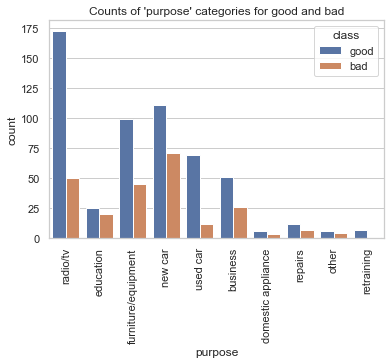

Percentage of radio/tv classified as bad: 22.42%
Percentage of education classified as bad: 44.44%
Percentage of furniture/equipment classified as bad: 31.25%
Percentage of new car classified as bad: 39.01%
Percentage of used car classified as bad: 14.81%
Percentage of business classified as bad: 33.77%
Percentage of domestic appliance classified as bad: 33.33%
Percentage of repairs classified as bad: 36.84%
Percentage of other classified as bad: 40.0%
Percentage of retraining classified as bad: 12.5%




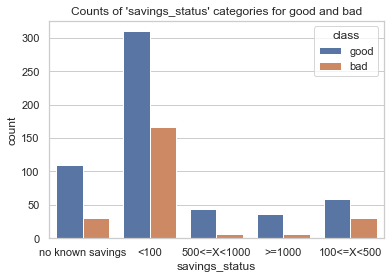

Percentage of no known savings classified as bad: 21.43%
Percentage of <100 classified as bad: 34.87%
Percentage of 500<=X<1000 classified as bad: 13.73%
Percentage of >=1000 classified as bad: 14.29%
Percentage of 100<=X<500 classified as bad: 33.71%




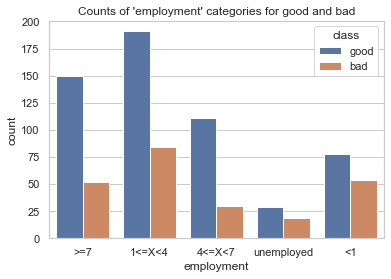

Percentage of >=7 classified as bad: 25.74%
Percentage of 1<=X<4 classified as bad: 30.55%
Percentage of 4<=X<7 classified as bad: 21.28%
Percentage of unemployed classified as bad: 39.58%
Percentage of <1 classified as bad: 40.91%




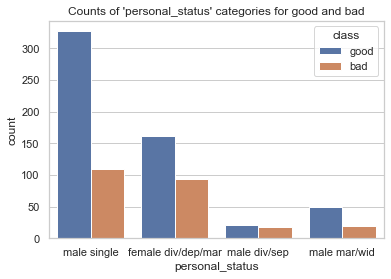

Percentage of male single classified as bad: 25.0%
Percentage of female div/dep/mar classified as bad: 36.47%
Percentage of male div/sep classified as bad: 44.74%
Percentage of male mar/wid classified as bad: 28.99%




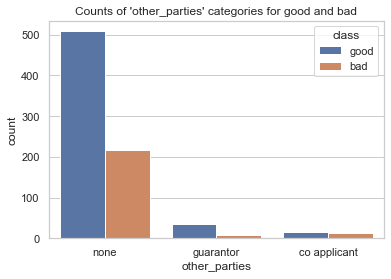

Percentage of none classified as bad: 29.89%
Percentage of guarantor classified as bad: 19.05%
Percentage of co applicant classified as bad: 46.67%




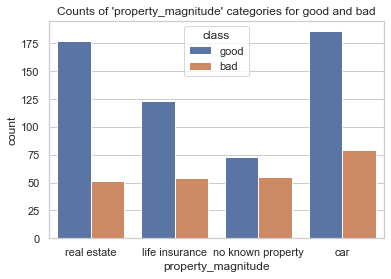

Percentage of real estate classified as bad: 22.37%
Percentage of life insurance classified as bad: 30.51%
Percentage of no known property classified as bad: 42.97%
Percentage of car classified as bad: 29.81%




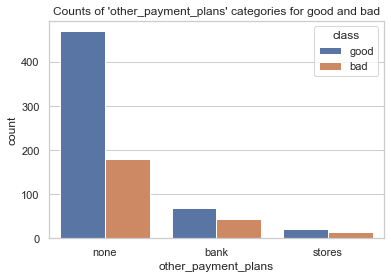

Percentage of none classified as bad: 27.8%
Percentage of bank classified as bad: 38.39%
Percentage of stores classified as bad: 42.86%




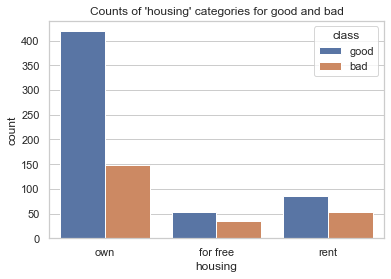

Percentage of own classified as bad: 26.23%
Percentage of for free classified as bad: 40.0%
Percentage of rent classified as bad: 38.57%




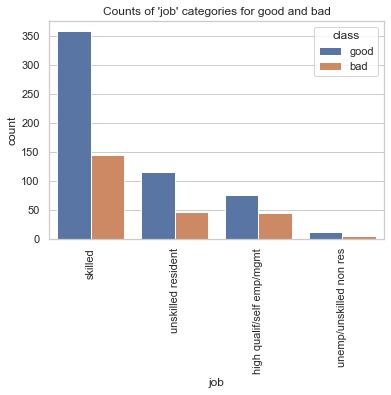

Percentage of skilled classified as bad: 28.69%
Percentage of unskilled resident classified as bad: 28.57%
Percentage of high qualif/self emp/mgmt classified as bad: 36.97%
Percentage of unemp/unskilled non res classified as bad: 31.25%




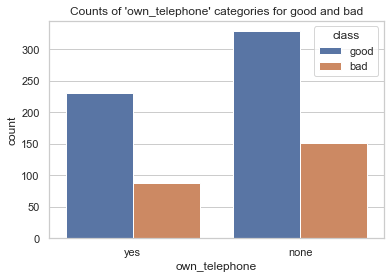

Percentage of yes classified as bad: 27.67%
Percentage of none classified as bad: 31.46%




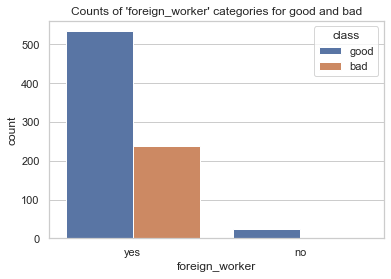

Percentage of yes classified as bad: 30.74%
Percentage of no classified as bad: 7.41%




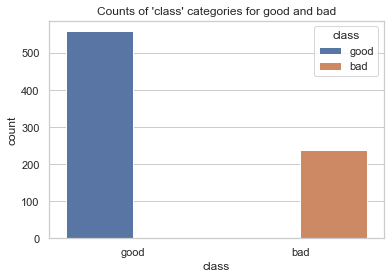

Percentage of good classified as bad: 0.0%
Percentage of bad classified as bad: 100.0%




In [8]:
for col in df.select_dtypes(include='object'):
#     plt.figure(figsize=(15,5))   
    plot = sns.countplot(x = col, data=df, hue = 'class')
    if col in ["purpose", "credit_history", "job"]:
            plt.xticks(rotation=90)
    plt.title(f"Counts of '{col}' categories for good and bad")
    plt.show()
    for category in df[col].unique():
        x = len(df[(df[col]==category) & (df['class']=='bad')]) / len(df[df[col]==category]) * 100
        x = round(x, 2)
        print(f"Percentage of {category} classified as bad: {x}%")
    print("\n")
# g = sns.countplot(x="Purpose", data=df_credit, 
#               palette="hls", hue = "Risk")

Numerical Features:

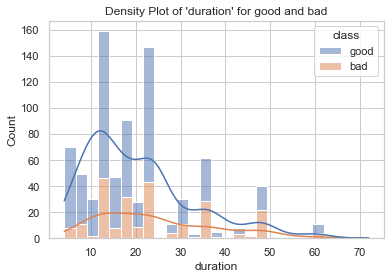

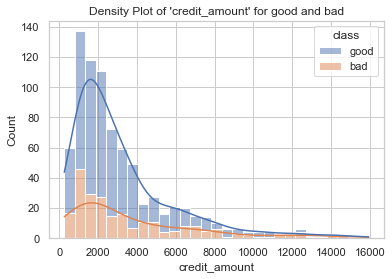

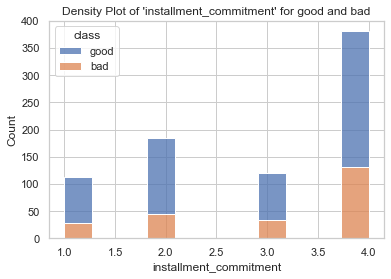

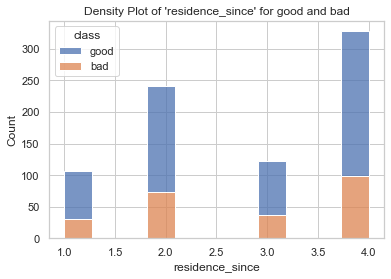

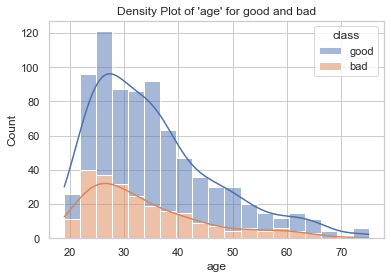

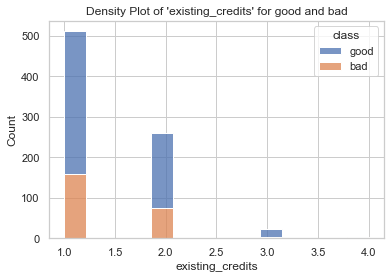

In [9]:
num_cols = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits']

for col in num_cols:
#     good = df[df[col] == 'good']
#     bad = df[df[col] == 'bad']
    kde = False
    if col in ['duration', 'credit_amount', 'age']:
        kde = True
    sns.histplot(data = df, x = col, hue='class', kde=kde, multiple="stack")
    plt.title(f"Density Plot of '{col}' for good and bad")
    plt.show()


    


## 4. Data Pre-processing and Feature Engineering

**Outlier Analysis:**



Next, let's create some box plots for the continuous numerical features to explore their distribution:




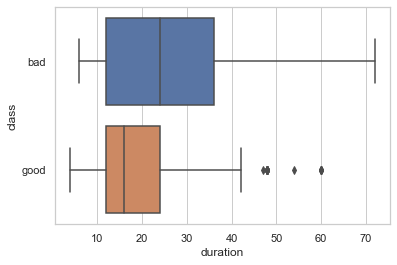

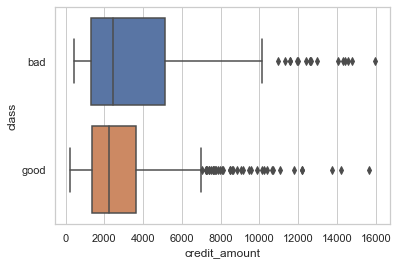

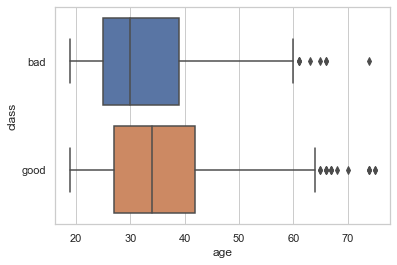

In [10]:
num_cols = ['duration', 'credit_amount', 'age']
for col in num_cols:
    sns.boxplot(y = df['class'].astype('category'), x = col, data=df)
    plt.show()

We can see that these variables have some outliers which lie outside the range where the majority of the rest of the data is. We can place upper and lower thresholds of 1.5x the interquartile range to handle these outliers.

In [11]:
def get_upper_lower_thresholds(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    up_limit = q3 + 1.5 * iqr
    low_limit = q1 - 1.5 * iqr
    return low_limit, up_limit


def outliers_check(df, num_cols):
    has_outliers = []
    for col in num_cols:
        low_limit, up_limit = get_upper_lower_thresholds(df, col)
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            number_of_outliers = df[(df[col] > up_limit) | (df[col] < low_limit)].shape[0]
            print(f"'{col}' number of outliers outside 1.5x the inter-quartile range: {number_of_outliers}")
            has_outliers.append(col)
    return has_outliers


outliers_check(df, num_cols)

'duration' number of outliers outside 1.5x the inter-quartile range: 56
'credit_amount' number of outliers outside 1.5x the inter-quartile range: 56
'age' number of outliers outside 1.5x the inter-quartile range: 29


['duration', 'credit_amount', 'age']

In [12]:
def replace_outliers_with_limits(df, col):
    low_limit, up_limit = get_upper_lower_thresholds(df, col)
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > up_limit), col] = up_limit

for col in ['duration', 'credit_amount', 'age']:
    replace_outliers_with_limits(df, col)

outliers_check(df, num_cols)

[]

**Feature Encoding**

In [13]:
for col in ["credit_history", "purpose", "savings_status", "personal_status", "other_parties", "other_payment_plans", "employment", "property_magnitude", "own_telephone", "foreign_worker", "job", "housing", 'checking_status']:
    le = LabelEncoder()
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df['class'] = df['class'].replace({'bad': 0, 'good': 1})



In [14]:
df

checking_status  duration  credit_history  purpose  credit_amount  \
0                  1         6               1        6       1169.000   
1                  0        42               3        6       5951.000   
2                  3        12               1        2       2096.000   
3                  1        42               3        3       7770.125   
4                  1        24               2        4       4870.000   
..               ...       ...             ...      ...            ...   
793                2        24               3        3       2892.000   
794                3        24               3        3       3062.000   
795                3         9               3        3       2301.000   
796                1        18               3        9       7511.000   
797                3        12               1        3       1258.000   

     savings_status  employment  installment_commitment  personal_status  \
0                 4           3                       4                3   
1                 2           0                       2                0   
2                 2           1                       2                3   
3                 2           1                       2                3   
4                 2           0                       3                3   
..              ...         ...                     ...              ...   
793               2           3                       3                1   
794               1           3                       4                3   
795               0           2                       2                0   
796               4           3                       1                3   
797               2           2                       2                0   

     other_parties  residence_since  property_magnitude  age  \
0                2                4                   3   62   
1                2                2                   3   22   
2                2                3                   3   49   
3                1                4                   1   45   
4                2                4                   2   53   
..             ...              ...                 ...  ...   
793              2                4                   2   51   
794              2                3                   2   32   
795              2                4                   1   22   
796              2                4                   1   51   
797              2                4                   1   22   

     other_payment_plans  housing  existing_credits  job  num_dependents  \
0                      1        1                 2    1               1   
1                      1        1                 1    1               1   
2                      1        1                 1    3               2   
3                      1        0                 1    1               2   
4                      1        0                 2    1               2   
..                   ...      ...               ...  ...             ...   
793                    1        0                 1    1               1   
794                    1        2                 1    1               1   
795                    1        2                 1    1               1   
796                    1        0                 1    1               2   
797                    1        2                 2    3               1   

     own_telephone  foreign_worker  class  
0                1               1      1  
1                0               1      0  
2                0               1      1  
3                0               1      1  
4                0               1      0  
..             ...             ...    ...  
793              0               1      1  
794              1               1      1  
795              0               1      1  
796              1               1      0  
797              0               1   

Standardising our continuous numerical variables **duration**, **credit_amount**, **age**:

In [15]:
for col in ['duration', 'credit_amount', 'age']:
    std_scaler = StandardScaler()
    df[col] = std_scaler.fit_transform(df[col].values.reshape(-1,1))

In [16]:
df

checking_status  duration  credit_history  purpose  credit_amount  \
0                  1 -1.320416               1        6      -0.851865   
1                  0  2.065544               3        6       1.385029   
2                  3 -0.756089               1        2      -0.418239   
3                  1  2.065544               3        3       2.235967   
4                  1  0.372564               2        4       0.879365   
..               ...       ...             ...      ...            ...   
793                2  0.372564               3        3      -0.045891   
794                3  0.372564               3        3       0.033630   
795                3 -1.038253               3        3      -0.322345   
796                1 -0.191763               3        9       2.114756   
797                3 -0.756089               1        3      -0.810233   

     savings_status  employment  installment_commitment  personal_status  \
0                 4           3                       4                3   
1                 2           0                       2                0   
2                 2           1                       2                3   
3                 2           1                       2                3   
4                 2           0                       3                3   
..              ...         ...                     ...              ...   
793               2           3                       3                1   
794               1           3                       4                3   
795               0           2                       2                0   
796               4           3                       1                3   
797               2           2                       2                0   

     other_parties  residence_since  property_magnitude       age  \
0                2                4                   3  2.445612   
1                2                2                   3 -1.204794   
2                2                3                   3  1.259230   
3                1                4                   1  0.894190   
4                2                4                   2  1.624271   
..             ...              ...                 ...       ...   
793              2                4                   2  1.441751   
794              2                3                   2 -0.292193   
795              2                4                   1 -1.204794   
796              2                4                   1  1.441751   
797              2                4                   1 -1.204794   

     other_payment_plans  housing  existing_credits  job  num_dependents  \
0                      1        1                 2    1               1   
1                      1        1                 1    1               1   
2                      1        1                 1    3               2   
3                      1        0                 1    1               2   
4                      1        0                 2    1               2   
..                   ...      ...               ...  ...             ...   
793                    1        0                 1    1               1   
794                    1        2                 1    1               1   
795                    1        2                 1    1               1   
796                    1        0                 1    1               2   
797                    1        2                 2    3               1   

     own_telephone  foreign_worker  class  
0                1               1      1  
1                0               1      0  
2                0               1      1  
3                0               1      1  
4                0               1      0  
..             ...             ...    ...  
793              0               1      1  
794              1               1      1  
795              0               1      1  
796              1   

**Feature Selection**

*Correlation Heatmap:*

<AxesSubplot:>

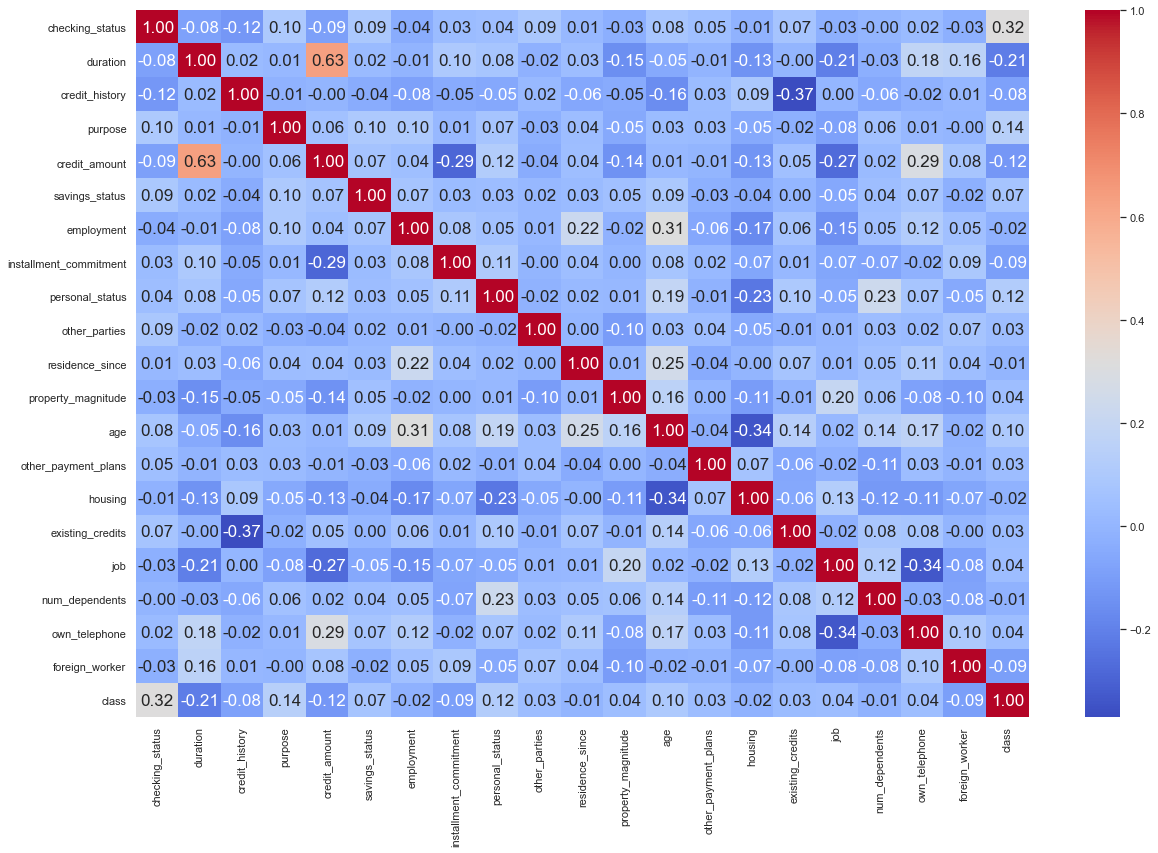

In [17]:
plt.figure(figsize=(20,13))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f",
            annot_kws={'size':17},
            cbar=True)

For the categorical variables, we can use a chi-squared test to determine whether or not they have a meaningful correlation to the 'class' target. We will only select categorical features with meaningful correlation to use in our model. 

In [18]:
def corr_to_target(col):
    contingency_table = pd.crosstab(df['class'], df[col])
    chi2, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    if(p_value>0.05):
        print(f"No significant correlation between the target (class) and {col}\n")
    else:
        print(f"Significant correlation between the target (class) and {col}")
        print("p-value:", p_value)
        print('\n')

In [19]:
for col in cat_cols:
    if col == "class":
        pass
    else:
        corr_to_target(col)

Significant correlation between the target (class) and checking_status
p-value: 7.082562999210413e-21


Significant correlation between the target (class) and credit_history
p-value: 8.147367095552182e-09


Significant correlation between the target (class) and purpose
p-value: 0.0005835908539298064


Significant correlation between the target (class) and savings_status
p-value: 0.00017817404026571038


Significant correlation between the target (class) and employment
p-value: 0.0024313071818130045


Significant correlation between the target (class) and personal_status
p-value: 0.0025828821993882974


Significant correlation between the target (class) and other_parties
p-value: 0.04124015180854718


Significant correlation between the target (class) and property_magnitude
p-value: 0.0008475938166062993


Significant correlation between the target (class) and other_payment_plans
p-value: 0.018184189919915755


Significant correlation between the target (class) and housing
p-value: 0.00

Based on the above, let's drop the **job** and **own_telephone** features:

In [20]:
df.drop(labels=['job', 'own_telephone'], axis=1, inplace=True)
df

checking_status  duration  credit_history  purpose  credit_amount  \
0                  1 -1.320416               1        6      -0.851865   
1                  0  2.065544               3        6       1.385029   
2                  3 -0.756089               1        2      -0.418239   
3                  1  2.065544               3        3       2.235967   
4                  1  0.372564               2        4       0.879365   
..               ...       ...             ...      ...            ...   
793                2  0.372564               3        3      -0.045891   
794                3  0.372564               3        3       0.033630   
795                3 -1.038253               3        3      -0.322345   
796                1 -0.191763               3        9       2.114756   
797                3 -0.756089               1        3      -0.810233   

     savings_status  employment  installment_commitment  personal_status  \
0                 4           3                       4                3   
1                 2           0                       2                0   
2                 2           1                       2                3   
3                 2           1                       2                3   
4                 2           0                       3                3   
..              ...         ...                     ...              ...   
793               2           3                       3                1   
794               1           3                       4                3   
795               0           2                       2                0   
796               4           3                       1                3   
797               2           2                       2                0   

     other_parties  residence_since  property_magnitude       age  \
0                2                4                   3  2.445612   
1                2                2                   3 -1.204794   
2                2                3                   3  1.259230   
3                1                4                   1  0.894190   
4                2                4                   2  1.624271   
..             ...              ...                 ...       ...   
793              2                4                   2  1.441751   
794              2                3                   2 -0.292193   
795              2                4                   1 -1.204794   
796              2                4                   1  1.441751   
797              2                4                   1 -1.204794   

     other_payment_plans  housing  existing_credits  num_dependents  \
0                      1        1                 2               1   
1                      1        1                 1               1   
2                      1        1                 1               2   
3                      1        0                 1               2   
4                      1        0                 2               2   
..                   ...      ...               ...             ...   
793                    1        0                 1               1   
794                    1        2                 1               1   
795                    1        2                 1               1   
796                    1        0                 1               2   
797                    1        2                 2               1   

     foreign_worker  class  
0                 1      1  
1                 1      0  
2                 1      1  
3                 1      1  
4                 1      0  
..              ...    ...  
793               1      1  
794               1      1  
795               1      1  
796               1      0  
797               1      1  

[798 rows x 19 columns]

*Now that we can export our processed data set to use in the Prediction notebook:*

In [21]:
df.to_csv('credit_data_processed.csv', index=False)